<a href="https://colab.research.google.com/github/kwbentleyjr/data_analytics_2/blob/main/Python/Unit3_Mini_Project_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [3]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
df.shape

(17614, 5)

In [5]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [6]:
ny_df = df[df['state']=='New York']

In [7]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [8]:
ny_df.shape

(322, 5)

In [9]:
ny_df.tail()

,date,state,fips,cases,deaths
17372,2021-01-12,New York,36,1164819,39588
17427,2021-01-13,New York,36,1179523,39760
17482,2021-01-14,New York,36,1193710,39997
17537,2021-01-15,New York,36,1213179,40203
17592,2021-01-16,New York,36,1229124,40376


In [10]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [11]:
#total number of cases
ny_df['cases'].max()

1229124

In [12]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

144058132

Finding new covid 19 cases on daily basis (new cases added everyday)

In [13]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [14]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [16]:
ny_df['new_cases'].sum()

1229124

In [17]:
ny_df.drop(['fips'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [19]:
type(ny_new_cases)

pandas.core.series.Series

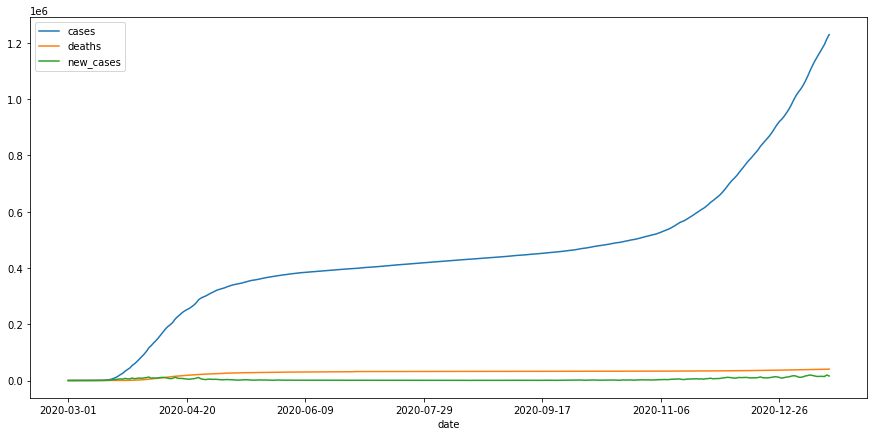

In [20]:
ny_df.plot(x='date', kind='line', figsize=(15,7))

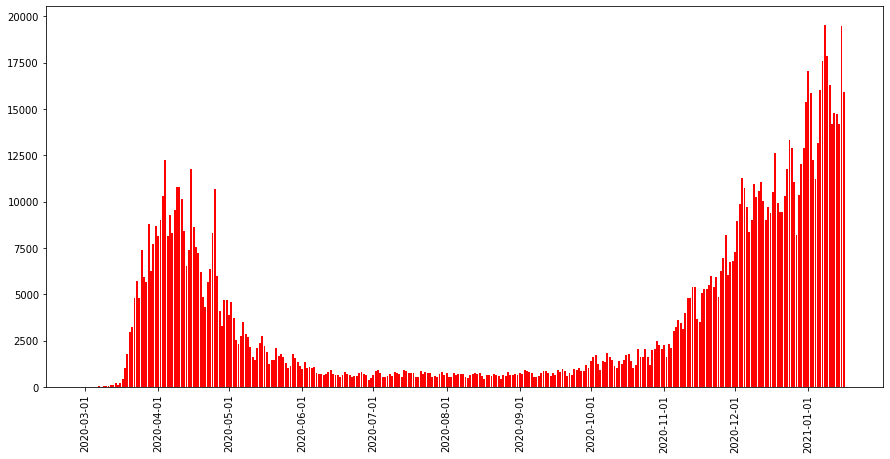

In [21]:
months=['2020-03-01', 
        '2020-04-01', 
        '2020-05-01', 
        '2020-06-01', 
        '2020-07-01', 
        '2020-08-01', 
        '2020-09-01', 
        '2020-10-01', 
        '2020-11-01', 
        '2020-12-01', 
        '2021-01-01']
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(ticks=months, rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [22]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [23]:
# ny_dates_30

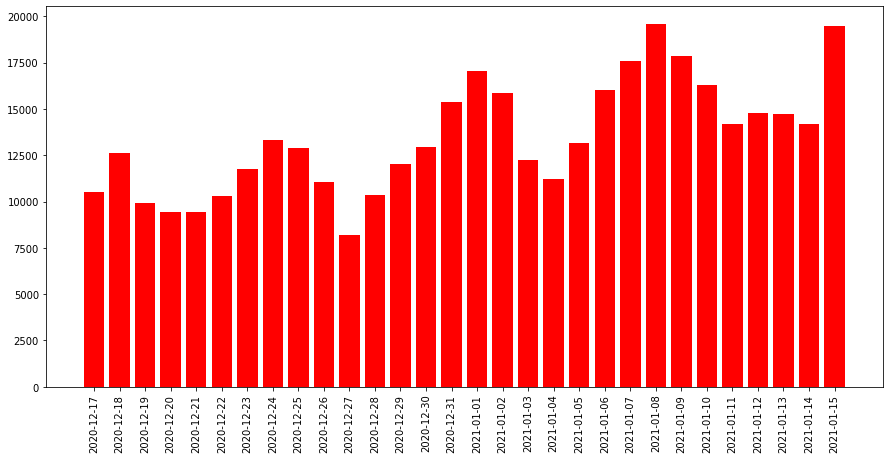

In [24]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

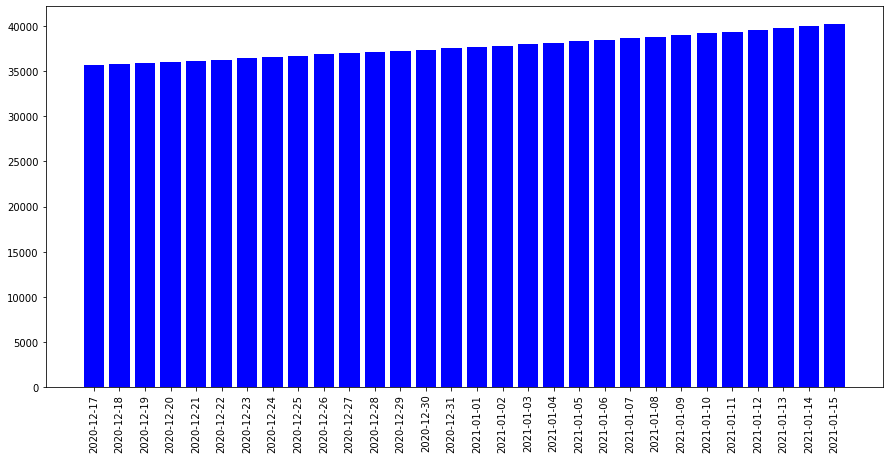

In [25]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [26]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

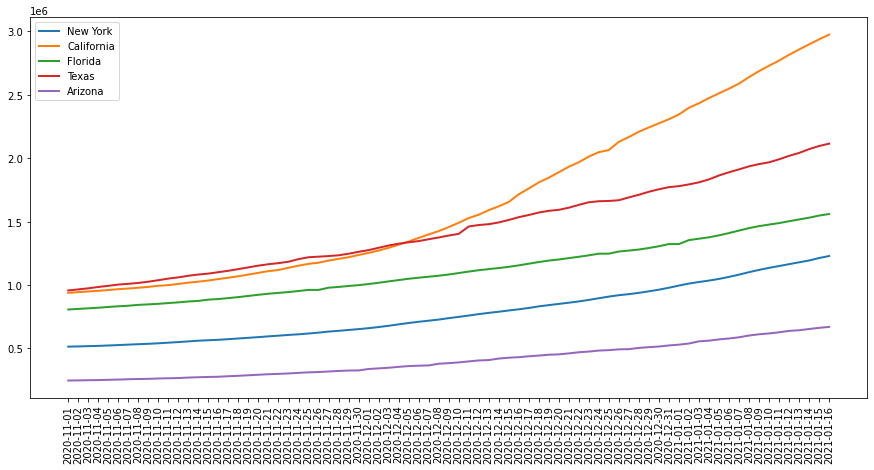

In [27]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Other Research Questions

**1.  How many new cases in Texas in December?**


In [28]:
df1=df.copy() #make a copy of the dataset
df1['date'] = pd.to_datetime(df1['date']) #convert column to datetime
df1 = df1[df1['date'].dt.month == 12] #pick December data

In [29]:
tx_df = df1[df1['state']=='Texas'] #make a new data set with Texas values

In [30]:
tx_df.head()

,date,state,fips,cases,deaths
15075,2020-12-01,Texas,48,1275499,22204
15130,2020-12-02,Texas,48,1294064,22422
15185,2020-12-03,Texas,48,1311988,22645
15240,2020-12-04,Texas,48,1326103,22890
15295,2020-12-05,Texas,48,1337296,23111


In [31]:
previous_row = df[(df['state']=='Texas') & (df['date']=='2020-11-30')]#select the row previous to Dec 1, 2020

In [32]:
print(previous_row)

             date  state  fips    cases  deaths
15020  2020-11-30  Texas    48  1262145   21968


In [33]:
newcase = [] #compute number of new cases per day
previous_case = previous_row.iloc[0]['cases']
for index, row in tx_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previous_case
  previous_case = current_case
  newcase.append(newcase_count)

In [34]:
tx_df['new_cases']=newcase #add a column for new cases

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
tx_df.head()

,date,state,fips,cases,deaths,new_cases
15075,2020-12-01,Texas,48,1275499,22204,13354
15130,2020-12-02,Texas,48,1294064,22422,18565
15185,2020-12-03,Texas,48,1311988,22645,17924
15240,2020-12-04,Texas,48,1326103,22890,14115
15295,2020-12-05,Texas,48,1337296,23111,11193


In [36]:
tx_df.new_cases.sum()#sum of new Texas cases in December

510018

In [37]:
tx_dates=tx_df['date']
tx_new_cases=tx_df['new_cases']

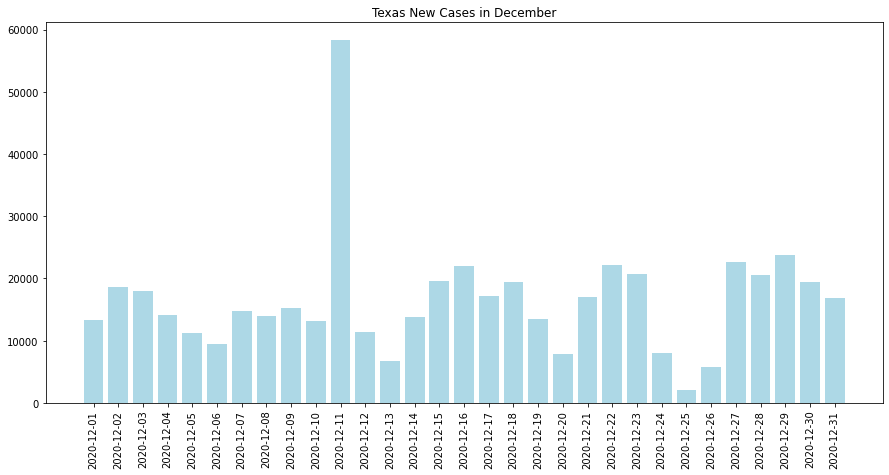

In [38]:
plt.figure(figsize=(15,7))
plt.bar(x=tx_dates, height=tx_new_cases, color='lightblue')
plt.xticks(ticks=tx_dates, rotation=90)
plt.title('Texas New Cases in December')
plt.show()

**2.  Which States Have the Highest Number of Deaths?**

In [39]:
max_state_deaths=df.groupby(['state'])['deaths'].max()

In [40]:
msd_df=pd.DataFrame({'Deaths': max_state_deaths}).reset_index()

In [41]:
msd_df.sort_values(['Deaths'], ascending=False, inplace=True)

In [42]:
msd_df.reset_index(drop=True, inplace=True)

In [43]:
Top_5=msd_df.head()

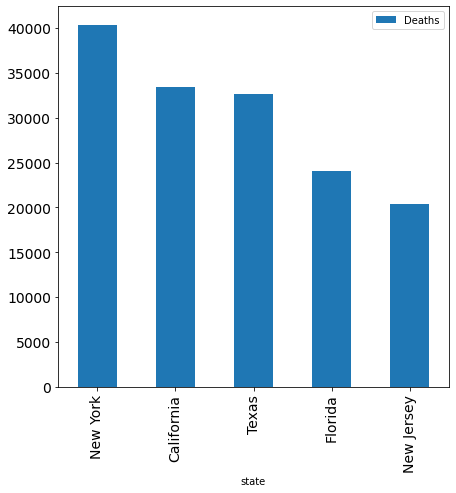

In [44]:
Top_5.plot.bar(y='Deaths', x='state', figsize=(7,7), fontsize=14)

**3.  Compare New Jersey New Cases to Deaths in May**

In [45]:
df2=df.copy() #make a copy of the dataset
df2['date'] = pd.to_datetime(df2['date']) #convert column to datetime
df2 = df2[df2['date'].dt.month == 5] #pick May data

In [46]:
nj_df = df2[df2['state']=='New Jersey']

In [47]:
nj_df.head()

,date,state,fips,cases,deaths
3290,2020-05-01,New Jersey,34,121190,7538
3345,2020-05-02,New Jersey,34,123717,7742
3400,2020-05-03,New Jersey,34,126744,7871
3455,2020-05-04,New Jersey,34,128269,7910
3510,2020-05-05,New Jersey,34,130593,8244


In [48]:
#select the row previous to May 1, 2020
previous_row2 = df[(df['state']=='New Jersey') & (df['date']=='2020-04-30')]

In [49]:
print(previous_row2)

            date       state  fips   cases  deaths
3235  2020-04-30  New Jersey    34  118652    7228


In [50]:
njnewcase = [] #compute number of new cases per day
njprevious_case = previous_row2.iloc[0]['cases']
for index, row in nj_df.iterrows():
  njcurrent_case = row['cases']
  njnewcase_count = njcurrent_case - njprevious_case
  njprevious_case = njcurrent_case
  njnewcase.append(njnewcase_count)

In [51]:
njnewdeaths = [] #compute number of new deaths per day
njprevious_deaths = previous_row2.iloc[0]['deaths']
for index, row in nj_df.iterrows():
  njcurrent_deaths = row['deaths']
  njnewdeaths_count = njcurrent_deaths - njprevious_deaths
  njprevious_deaths = njcurrent_deaths
  njnewdeaths.append(njnewdeaths_count)

In [52]:
nj_df['new_cases']=njnewcase #add a column for new cases

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
nj_df['new_deaths']=njnewdeaths #add a column for new deaths

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
nj_df.head(10)

,date,state,fips,cases,deaths,new_cases,new_deaths
3290,2020-05-01,New Jersey,34,121190,7538,2538,310
3345,2020-05-02,New Jersey,34,123717,7742,2527,204
3400,2020-05-03,New Jersey,34,126744,7871,3027,129
3455,2020-05-04,New Jersey,34,128269,7910,1525,39
3510,2020-05-05,New Jersey,34,130593,8244,2324,334
3565,2020-05-06,New Jersey,34,131890,8549,1297,305
3620,2020-05-07,New Jersey,34,133635,8801,1745,252
3675,2020-05-08,New Jersey,34,135454,8952,1819,151
3730,2020-05-09,New Jersey,34,137085,9116,1631,164
3785,2020-05-10,New Jersey,34,138532,9255,1447,139


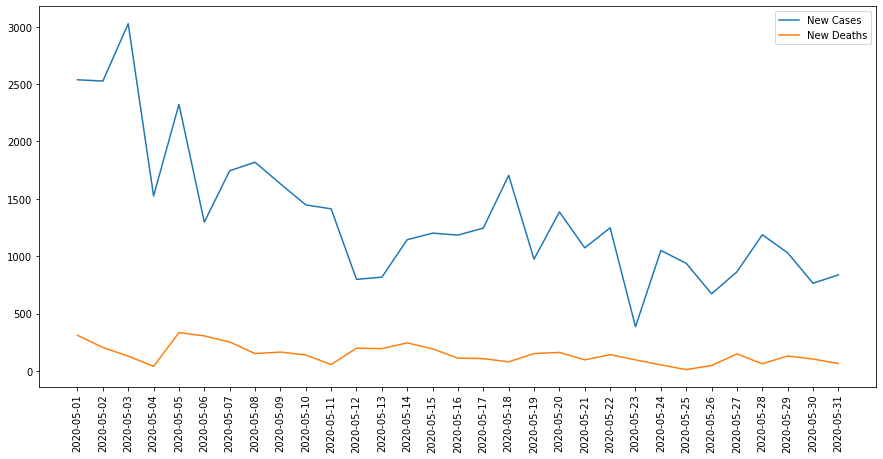

In [55]:
plt.figure(figsize=(15,7))
plt.plot(nj_df['date'], nj_df['new_cases'], label='New Cases')
plt.plot(nj_df['date'], nj_df['new_deaths'], label='New Deaths')
plt.xticks(ticks=nj_df['date'], rotation=90)
plt.legend(['New Cases', 'New Deaths'])
plt.show()

# Conclusion

Below are the conclusions:



Conclusion 1
     
COVID-19 cases in New York increased rapidly at the beginning of the pandemic, flattenend over the summer, then experienced another increase in November that continues to the present.

Conclusion 2
     
Each week in the last thirty days has seen an increase in new cases.

Conclusion 3

From November, Texas and California had a similar number of cases, but California has seen a greater increase in cases to the present.

Conclusion 4

New cases in Texas have increased every week.  There were two datapoints that were out of bounds, 2020-12-11 and 2020-12-25. The former could be due to previously unaccounted for cases.  The latter could be due to a lack of reporting on the Christmas holiday.

Conclusion 5

While New York has the highest number of deaths over the pandemic, California is in second, with Texas, Florida and New Jersey rounding off the top 5 total number of deaths per state.

Conclusion 6

As New Jersey new cases in May dropped dramaically, new deaths did not fall as rapidly.  This gives credence to the supposition that deaths lags behind cases.

